In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [2]:
palette = ['#7a5195', '#ef5675', '#ffa600'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Distance beetwen AP and STAs [m]"

In [3]:
data = pd.read_csv('MLOn27.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario,MLOn
0,407460,1,1,27,2,83.5552,0.001082,2.74561,17.6019,276759000,...,1101413,1.02209,1.02209,120.981,120.981,196.017,497298,ns3::ThompsonSamplingWifiManager,B,0
1,407460,2,1,27,2,84.0824,0.001091,2.81013,17.0584,267885904,...,1101413,1.04676,1.04676,120.859,120.859,191.245,492667,ns3::ThompsonSamplingWifiManager,B,0
2,407460,3,1,27,2,84.4406,0.001101,2.89808,16.9987,261857944,...,1101413,3.45197,3.45197,120.980,120.980,188.692,496652,ns3::ThompsonSamplingWifiManager,B,0
3,407460,4,1,27,2,84.6887,0.001135,2.83579,16.3855,257683448,...,1101413,1.01436,1.01436,120.996,120.996,191.358,478231,ns3::ThompsonSamplingWifiManager,B,0
4,407461,1,1,27,2,83.6235,0.001068,2.64497,17.5356,275609944,...,1101413,1.01029,1.01029,120.922,120.922,192.664,477081,ns3::ThompsonSamplingWifiManager,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118,435,4,1,27,2,69.3704,0.000573,2.03681,32.7801,515483024,...,1101413,1.01830,1.01830,120.994,120.994,193.245,687133,ns3::ThompsonSamplingWifiManager,B,3
1119,416,1,1,27,2,73.4916,0.000706,2.22782,28.3711,446125576,...,1101413,1.01940,1.01940,120.989,120.989,206.140,650449,ns3::ThompsonSamplingWifiManager,B,3
1120,416,2,1,27,2,74.3602,0.000706,2.29780,27.9215,431507200,...,1101413,3.09261,3.09261,121.000,121.000,199.268,648899,ns3::ThompsonSamplingWifiManager,B,3
1121,416,3,1,27,2,70.9579,0.000622,2.12621,31.0800,488767472,...,1101413,1.01927,1.01927,121.000,121.000,199.012,680118,ns3::ThompsonSamplingWifiManager,B,3


In [4]:
# Utwórz kolumny logiczne
data = data.copy()
data['flow_leq_MLOn'] = data['flow'] <= data['MLOn']
data['flow_gt_MLOn'] = data['flow'] > data['MLOn']

In [5]:
df0 = (
    data[data['flow_leq_MLOn']]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'MLOn'], as_index=False)
    .mean(numeric_only=True)
    .assign(flow='≤MLOn')
)

df1 = (
    data[data['flow_gt_MLOn']]
    .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'MLOn'], as_index=False)
    .mean(numeric_only=True)
    .assign(flow='>MLOn')
)

#  Suma flow 0 + 1
df_sum = (
    data
        .groupby(['scenario', 'distance', 'linksNumber', 'rngRun', 'MLOn'], as_index=False)
        .mean(numeric_only=True)
        .assign(flow='1+2')                       # sztuczna etykieta – tylko żeby było wiadomo
)

In [6]:
df_sum

,scenario,distance,linksNumber,rngRun,MLOn,flow,nStations,loss,jitter,latency,...,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,flow_leq_MLOn,flow_gt_MLOn
0,B,27,2,1,0,1+2,1.0,84.159425,0.001097,2.762880,...,174470.25,1101413.0,1.284312,1.284312,120.89675,120.89675,191.23750,482077.25,0.00,1.00
1,B,27,2,1,2,1+2,1.0,71.295375,0.000617,2.133400,...,316156.50,1101413.0,1.788945,1.788945,120.99225,120.99225,193.29475,672161.25,0.50,0.50
2,B,27,2,2,0,1+2,1.0,84.353525,0.001118,2.803540,...,172332.25,1101413.0,1.554677,1.554677,120.97825,120.97825,192.60350,483103.25,0.00,1.00
3,B,27,2,3,0,1+2,1.0,84.195350,0.001112,2.787885,...,174074.75,1101413.0,2.068915,2.068915,120.99100,120.99100,193.08800,485449.75,0.00,1.00
4,B,27,2,4,0,1+2,1.0,84.168725,0.001108,2.806125,...,174367.50,1101413.0,1.294333,1.294333,120.98925,120.98925,192.74050,489107.75,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,D,27,3,407482,0,1+2,1.0,84.150450,0.001096,2.765227,...,174569.00,1101413.0,2.036715,2.036715,120.97175,120.97175,191.22025,482782.25,0.00,1.00
277,D,27,3,407482,1,1+2,1.0,72.203575,0.000700,2.228842,...,306153.50,1101413.0,1.770780,1.770780,120.98475,120.98475,184.58075,629461.00,0.25,0.75
278,D,27,3,407483,0,1+2,1.0,84.114075,0.001093,2.776178,...,174970.00,1101413.0,1.824968,1.824968,120.94700,120.94700,190.94250,485246.75,0.00,1.00
279,D,27,3,407483,1,1+2,1.0,71.770425,0.000685,2.221245,...,310924.50,1101413.0,1.775045,1.775045,120.98775,120.98775,183.48075,638105.50,0.25,0.75


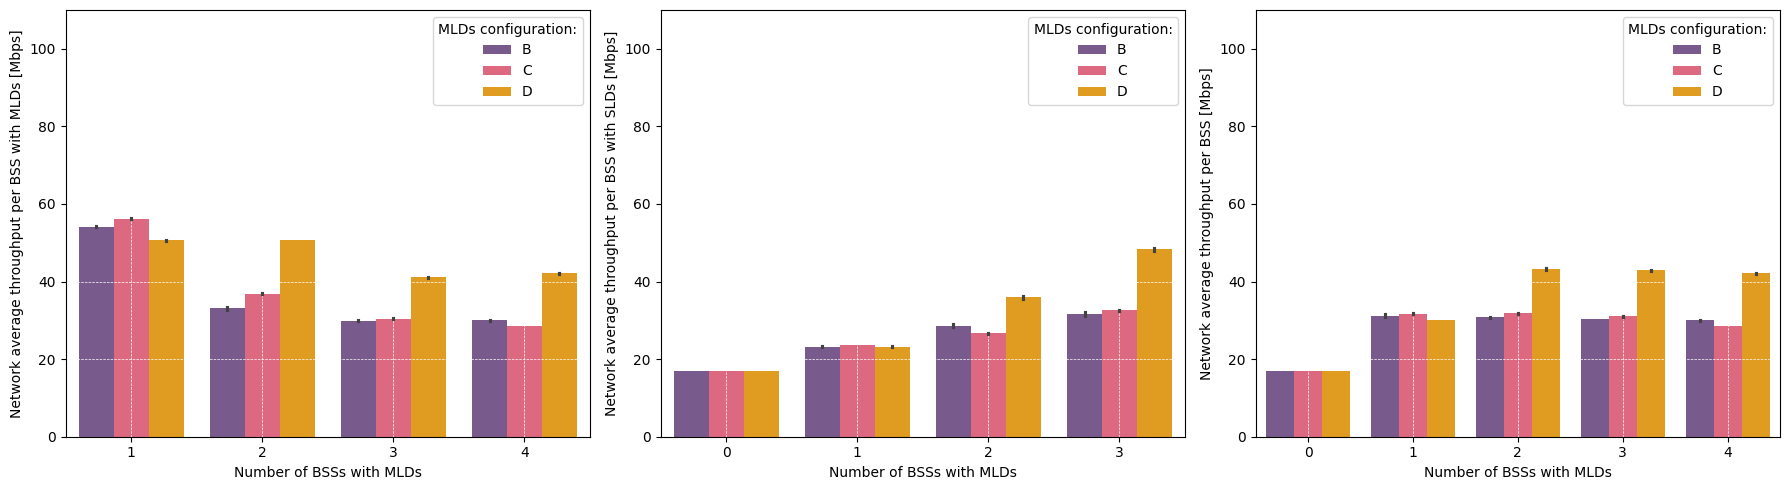

In [7]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Number of BSSs with MLDs"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Network average throughput per BSS with MLDs [Mbps]'),
    (df1, 'Network average throughput per BSS with SLDs [Mbps]'),
    (df_sum, 'Network average throughput per BSS [Mbps]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='MLOn', y='throughput', hue='scenario',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:7],  # Przytnij, jeśli trzeba
        labels=['B', 'C', 'D'],  # Twoje etykiety
        ncol=1,
        fontsize='medium',   # Rozmiar czcionki
       title='MLDs configuration:',         # <- Tytuł legendy
       title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    if i != 2:
        axes[i].set_ylim(0, 110)
    else:
        axes[i].set_ylim(0, 110) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_thr_flows4.svg', bbox_inches='tight')
plt.show()

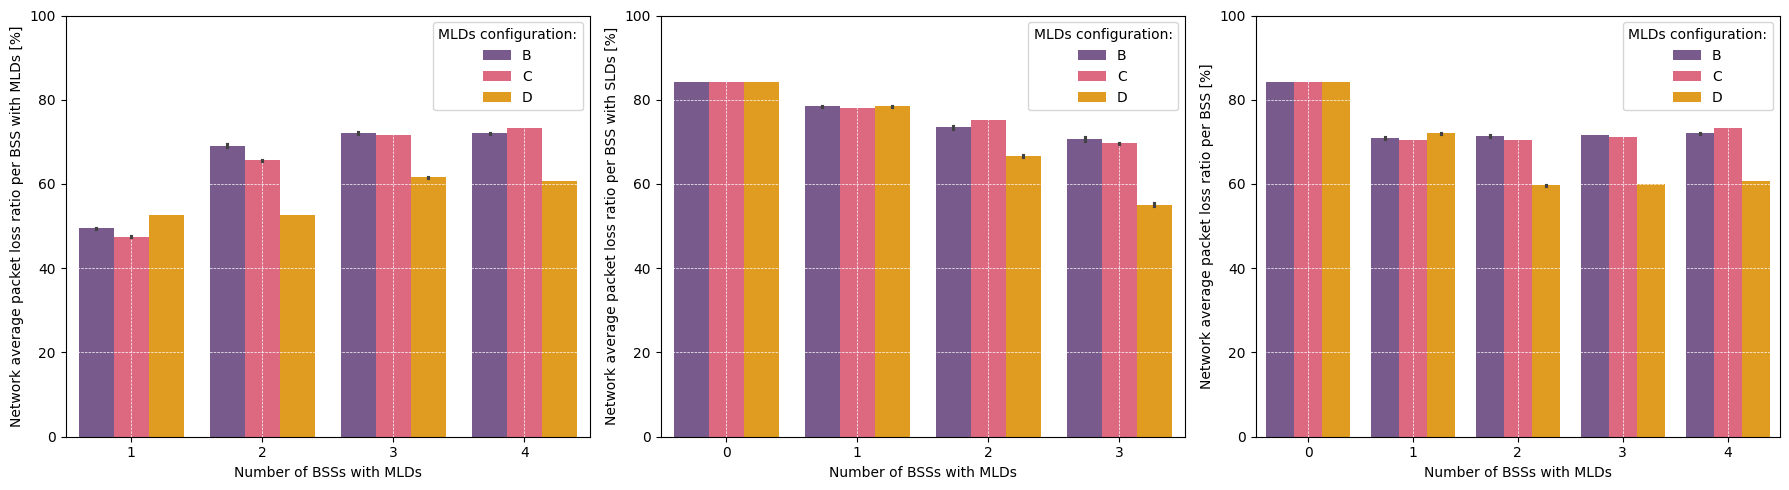

In [8]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Number of BSSs with MLDs"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Network average packet loss ratio per BSS with MLDs [%]'),
    (df1, 'Network average packet loss ratio per BSS with SLDs [%]'),
    (df_sum, 'Network average packet loss ratio per BSS [%]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='MLOn', y='loss', hue='scenario',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:7],  # Przytnij, jeśli trzeba
        labels=['B', 'C', 'D'],  # Twoje etykiety
        ncol=1,
        fontsize='medium',   # Rozmiar czcionki
       title='MLDs configuration:',         # <- Tytuł legendy
       title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    if i != 2:
        axes[i].set_ylim(0, 100)
    else:
        axes[i].set_ylim(0, 100) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_loss_flows4.svg', bbox_inches='tight')
plt.show()

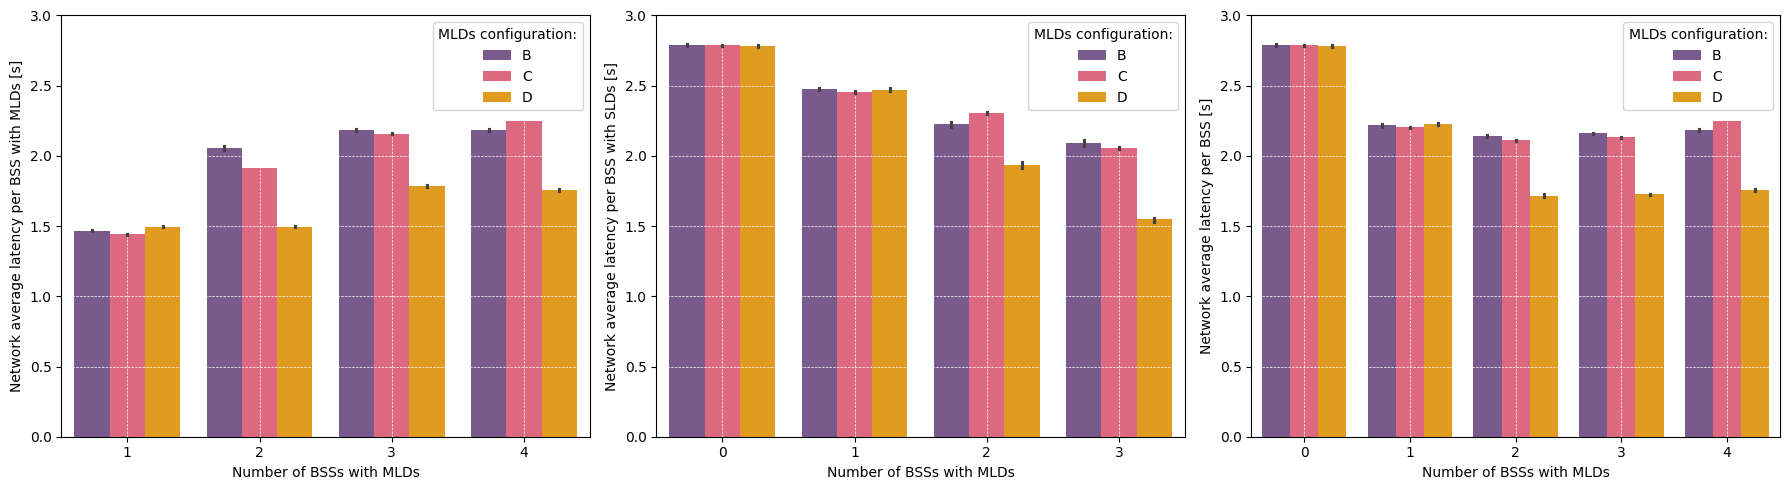

In [9]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Number of BSSs with MLDs"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Network average latency per BSS with MLDs [s]'),
    (df1, 'Network average latency per BSS with SLDs [s]'),
    (df_sum, 'Network average latency per BSS [s]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='MLOn', y='latency', hue='scenario',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:7],  # Przytnij, jeśli trzeba
        labels=['B', 'C', 'D'],  # Twoje etykiety
        ncol=1,
        fontsize='medium',   # Rozmiar czcionki
       title='MLDs configuration:',         # <- Tytuł legendy
       title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    if i != 2:
        axes[i].set_ylim(0, 3)
    else:
        axes[i].set_ylim(0, 3) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_latency_flows4.svg', bbox_inches='tight')
plt.show()

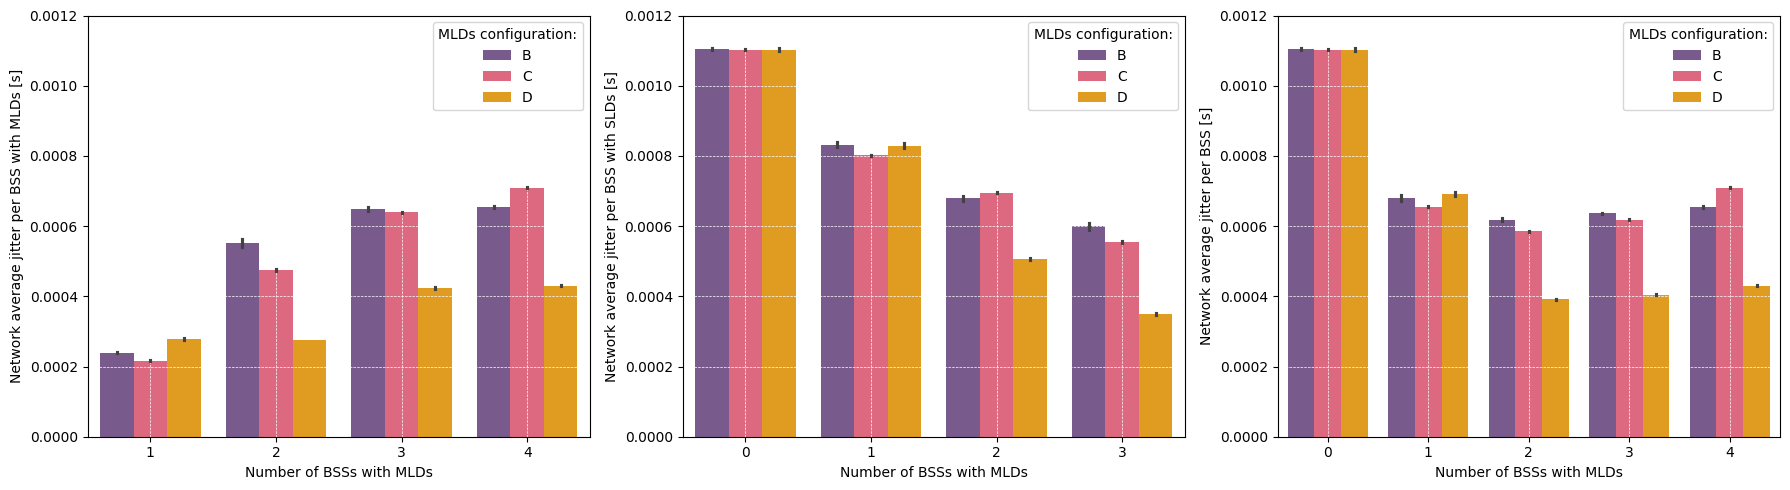

In [10]:
# ----------- Parametry wykresu -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)  # Trzy wykresy w jednym rzędzie
xlabel = "Number of BSSs with MLDs"

# Listy danych i tytułów do iteracji
plot_data = [
    (df0, 'Network average jitter per BSS with MLDs [s]'),
    (df1, 'Network average jitter per BSS with SLDs [s]'),
    (df_sum, 'Network average jitter per BSS [s]')
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(data=df, x='MLOn', y='jitter', hue='scenario',
                 errorbar=('ci'), palette=palette,
                 ax=axes[i])

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:7],  # Przytnij, jeśli trzeba
        labels=['B', 'C', 'D'],  # Twoje etykiety
        ncol=1,
        fontsize='medium',   # Rozmiar czcionki
       title='MLDs configuration:',         # <- Tytuł legendy
       title_fontsize='medium'    # <- Rozmiar czcionki tytułu
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    if i != 2:
        axes[i].set_ylim(0, 0.0012)
    else:
        axes[i].set_ylim(0, 0.0012) #, 225
    axes[i].grid(color='white', linestyle='--', linewidth=0.5)

# ----------- Zapis i wyświetlenie -----------

plt.tight_layout()
plt.savefig('dist_jitter_flows4.svg', bbox_inches='tight')
plt.show()